# ANALISIS DE CARACTERISTICAS
Vamos a identificar los features de mayor incencia en las predicciones, no solo su magintud, si no tambien su direccion.


## 01-BIBLIOTECAS

In [85]:
!pip install pandas numpy scikit-learn xgboost shap

In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from io import StringIO
import requests
from sklearn.pipeline import Pipeline
from joblib import dump
import sklearn
from io import StringIO
from io import BytesIO
from joblib import load
import xgboost as xgb
import shap
from xgboost import XGBClassifier

In [87]:
pip install --upgrade pandas numpy scikit-learn requests shap

##02-CARGA DE PREPROCESADOR Y MODELO.
Lo tenemos que hacer de esta forma, porque usando .joblib, se cargan dañados.

In [88]:
# Función para filtrar columnas
def filtrar_columnas(df):
    columnas_a_mantener = [
        'International plan', 'Voice mail plan', 'Number vmail messages',
        'Total day minutes', 'Total day charge', 'Total eve minutes',
        'Total eve charge', 'Total night minutes', 'Total night charge',
        'Total intl minutes', 'Total intl calls'                   # Como se puede observar, en el prepro, NO se incluye el target
    ]
    return df[columnas_a_mantener]

# Función que transforma 'International plan' a int.
def mapear_international_plan(df):
    df_copy = df.copy()  # Crear una copia del DataFrame
    df_copy['International plan'] = df_copy['International plan'].map({'Yes': 1, 'No': 0})
    return df_copy

# Función que transforma 'Voice mail plan' a int.
def mapear_voice_mail_plan(df):
    df_copy = df.copy()  # Crear una copia del DataFrame
    df_copy['Voice mail plan'] = df_copy['Voice mail plan'].map({'Yes': 1, 'No': 0})
    return df_copy

# Función para eliminar outliers
def eliminar_outliers(df):
    columns_to_check = ['Number vmail messages', 'Total day minutes',
                             'Total day charge', 'Total eve minutes',
                             'Total eve charge', 'Total night minutes',
                             'Total night charge', 'Total intl minutes',
                             'Total intl calls']

    df_copy = df.copy()

    for column in columns_to_check:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Eliminar las filas con outliers solo en la columna actual
        df_copy = df_copy.drop(df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)].index)

    return df_copy





# Creación de transformadores
Best_caracter = FunctionTransformer(filtrar_columnas)
Mapeo_01 = FunctionTransformer(mapear_international_plan)
Mapeo_02 = FunctionTransformer(mapear_voice_mail_plan)
Outliers_drop = FunctionTransformer(eliminar_outliers)


# Creación del pipeline de preprocesamiento
Prepro01 = Pipeline(steps=[
    ("Best_features", Best_caracter),
    ("Mapeo_01", Mapeo_01),
    ("Mapeo_02", Mapeo_02),
    ("Outliers_drop", Outliers_drop),
])
Prepro01

Pipeline(steps=[('Best_features',
                 FunctionTransformer(func=<function filtrar_columnas at 0x7b4a9ff043a0>)),
                ('Mapeo_01',
                 FunctionTransformer(func=<function mapear_international_plan at 0x7b4a9ff04670>)),
                ('Mapeo_02',
                 FunctionTransformer(func=<function mapear_voice_mail_plan at 0x7b4a9ff060e0>)),
                ('Outliers_drop',
                 FunctionTransformer(func=<function eliminar_outliers at 0x7b4a9ff05f30>))])

In [89]:
# Función para filtrar columnas
def filtrar_columnas(df):
    columnas_a_mantener = [
        'International plan', 'Voice mail plan', 'Number vmail messages',
        'Total day minutes', 'Total day charge', 'Total eve minutes',
        'Total eve charge', 'Total night minutes', 'Total night charge',
        'Total intl minutes', 'Total intl calls', 'Churn'                  # Como se puede observar, en el prepro, NO se incluye el target
    ]
    return df[columnas_a_mantener]

# Función que transforma 'International plan' a int.
def mapear_international_plan(df):
    df_copy = df.copy()  # Crear una copia del DataFrame
    df_copy['International plan'] = df_copy['International plan'].map({'Yes': 1, 'No': 0})
    return df_copy

# Función que transforma 'Voice mail plan' a int.
def mapear_voice_mail_plan(df):
    df_copy = df.copy()  # Crear una copia del DataFrame
    df_copy['Voice mail plan'] = df_copy['Voice mail plan'].map({'Yes': 1, 'No': 0})
    return df_copy

# Función para eliminar outliers
def eliminar_outliers(df):
    columns_to_check = ['Number vmail messages', 'Total day minutes',
                             'Total day charge', 'Total eve minutes',
                             'Total eve charge', 'Total night minutes',
                             'Total night charge', 'Total intl minutes',
                             'Total intl calls']

    df_copy = df.copy()

    for column in columns_to_check:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Eliminar las filas con outliers solo en la columna actual
        df_copy = df_copy.drop(df_copy[(df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)].index)

    return df_copy



# Definir función de mapeo de la variable objetivo
def mapear_target(df):
    df_copy = df.copy()  # Crear una copia del DataFrame
    df_copy['Churn'] = df_copy['Churn'].astype(int)  # Convertir valores booleanos a enteros (0 para False, 1 para True)
    return df_copy

# Df virgen
file_id = "16ypxCIBr9wSGVEaXqWdZUfz9w4xzccwo"
download_link = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(download_link)
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data, encoding='utf-8')

#Aplicamos funciones
df1 = filtrar_columnas(df)
df1 = mapear_international_plan(df1)
df1 = mapear_voice_mail_plan(df1)
df1 = eliminar_outliers(df1)
df1 = mapear_target(df1)


# Definimos las características según lo ya definido en la etapa de elección de modelo (no incluido en el Prepro01).
X = df1[['International plan', 'Voice mail plan', 'Number vmail messages',
        'Total day minutes', 'Total day charge', 'Total eve minutes',
        'Total eve charge', 'Total night minutes', 'Total night charge',
        'Total intl minutes', 'Total intl calls']]
y = df1.Churn

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Entrenar el modelo XGBoost
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
# IMPORTAMOS SET VIRGEN
file_id = "16ypxCIBr9wSGVEaXqWdZUfz9w4xzccwo"
download_link = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(download_link)
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data, encoding='utf-8')

In [91]:
# Variables predictoras y objeto.
X = df[['International plan', 'Voice mail plan', 'Number vmail messages',
        'Total day minutes', 'Total day charge', 'Total eve minutes',
        'Total eve charge', 'Total night minutes', 'Total night charge',
        'Total intl minutes', 'Total intl calls']]
y = df.Churn

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Pasamos datos virgenes por preprocesador
X_test=Prepro01.fit_transform(X_test)
X_train=Prepro01.fit_transform(X_train)

## 03-SHAP

In [96]:
# Crear el objeto explainer de SHAP
explainer = shap.Explainer(modelo,X_train)

In [98]:
# Cargamos datos en shap
shap_values = explainer(X_test)

 95%|=================== | 895/944 [00:15<00:00]       

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.790100, while the model output was 0.770000. If this difference is acceptable you can set check_additivity=False to disable this check.

# CONCLUSIONES GRAFICAS EN SHAP

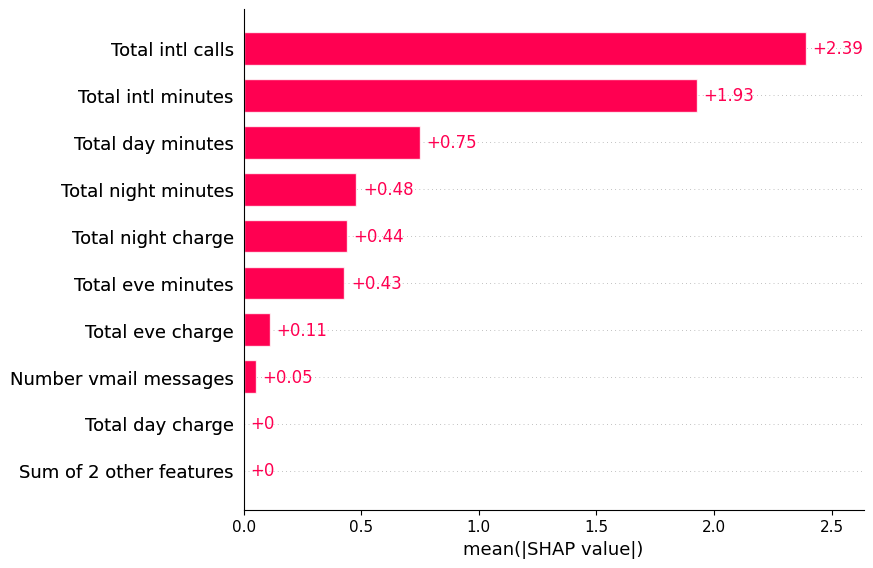

In [99]:
# Podemos obervar que hay 3 variables que destacas con respecto a los demas.
shap.plots.bar(shap_values)

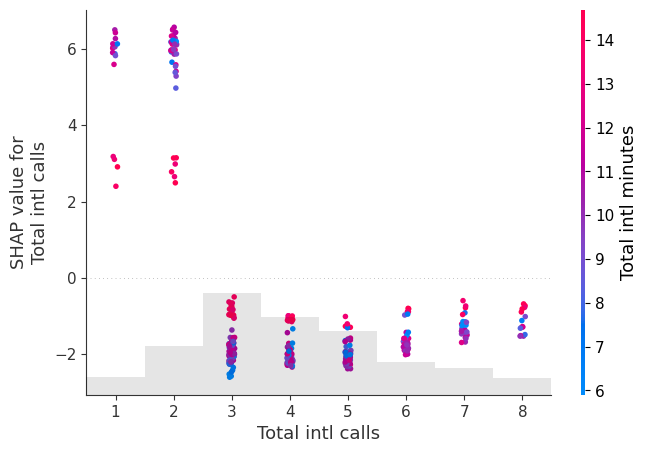

In [103]:
# Se puede  ver un punto de inflexion importante cuande se tratan  de llamadas internacionales mayores a 2, que afecta de forma positiva.
# Lo que quiere decir que aquellos que utilizan mucho el servicio internacional, son clientes que se quedan en la empresa.
shap.plots.scatter(shap_values[:,"Total intl calls"],color=shap_values)

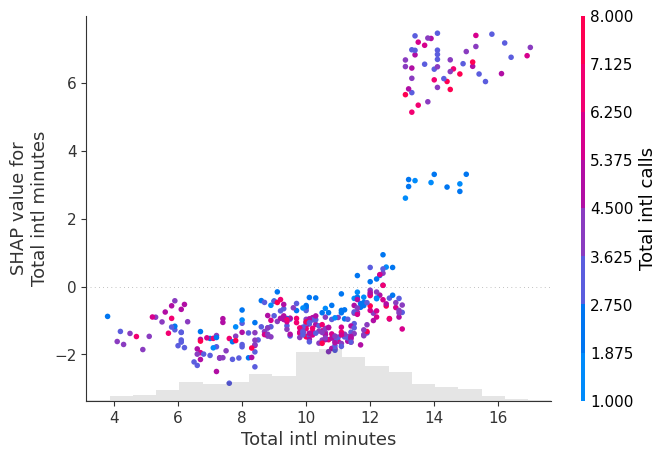

In [101]:
# Apartir de los 13 minutos se puede se puede ver una fuerta incidencia a que el cliente se baje del servicio.
shap.plots.scatter(shap_values[:,"Total intl minutes"],color=shap_values)

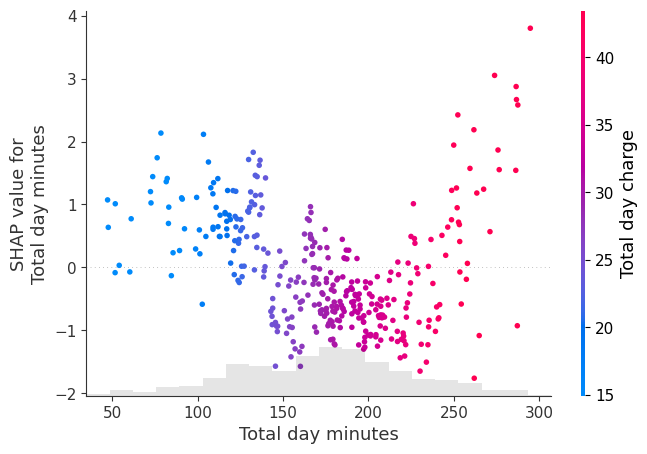

In [102]:
# Rango favorable para la empresa, entre los 140 y 230 minutos totales de llamada durante el dia.
shap.plots.scatter(shap_values[:,"Total day minutes"],color=shap_values)

In [ ]:
# Desarrollo global.
shap.initjs() #java
shap.plots.force(shap_values,figsize=(15,3),link= "logit")

In [114]:
# analisis particular para fila 310.
shap.initjs()
shap.plots.force(shap_values[310],figsize=(15,3),link="logit")